## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file_df = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_file_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_file_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_file_df.duplicated(subset=["Mouse ID", "Timepoint"])

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate = combined_file_df[combined_file_df.duplicated(subset=["Mouse ID", "Timepoint"], keep='first')]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_file_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first')
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_combined = clean_combined_df.groupby("Drug Regimen")

mean_tumor = grouped_combined["Tumor Volume (mm3)"].mean()
median_tumor = grouped_combined["Tumor Volume (mm3)"].median()
var_tumor = grouped_combined["Tumor Volume (mm3)"].var()
sd_tumor = grouped_combined["Tumor Volume (mm3)"].std()
sem_tumor = grouped_combined["Tumor Volume (mm3)"].sem()

summary_stats = pd.DataFrame({"Mean of Tumor Vol": mean_tumor,
                              "Median of Tumor Vol": median_tumor, 
                              "Variance of Tumor Vol": var_tumor, 
                              "Std Deviation of Tumor Vol": sd_tumor, 
                              "Std Error of Tumor Vol": sem_tumor})
summary_stats

,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Std Deviation of Tumor Vol,Std Error of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = grouped_combined.agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
agg_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

(0.0, 250.0)

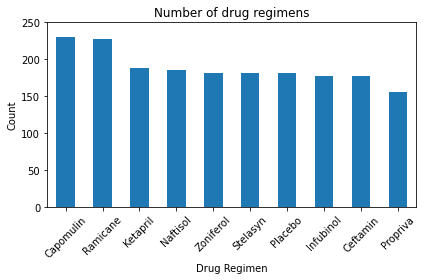

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measurements = clean_combined_df["Drug Regimen"].value_counts()
plt.figure()
drug_measurements.plot(kind="bar", title="Number of drug regimens", rot=45)

plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.tight_layout()

plt.ylim(0, 200+50)

(0.0, 250.0)

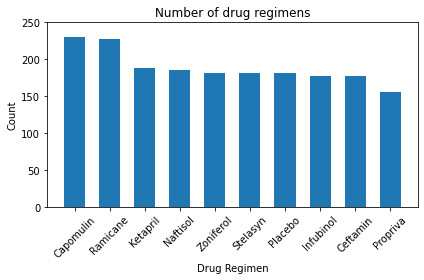

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#agg_stats = agg_stats.set_index("Drug Regimen")
x_axis = np.arange(len(drug_measurements))
plt.figure()
plt.bar(x_axis, drug_measurements, width=0.6)

plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Number of drug regimens")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation=45)
plt.tight_layout()
plt.ylim(0, 200+50)

(-1.1053783266922994,
 1.1002561107948714,
 -1.1062424936743749,
 1.1032653842934317)

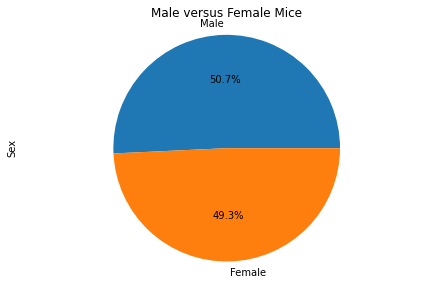

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_combined_df[["Mouse ID", "Sex"]]
plt.figure()
count = gender_group["Sex"].value_counts()

gender_pie = count.plot(kind="pie", title= "Male versus Female Mice", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")

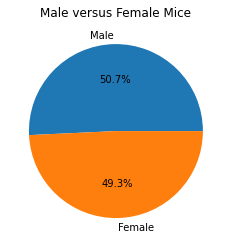

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

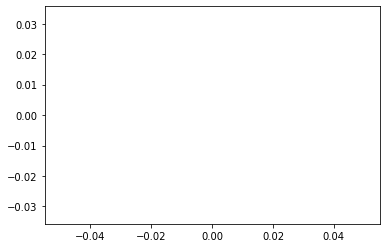

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.figure()
plt.pie(count, labels=labels, autopct="%1.1f%%")
plt.title("Male versus Female Mice")
plt.show()
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint



# grouped_id_time = clean_combined_df.groupby("Mouse ID")
# maxed = grouped_id_time["Timepoint"].max()

last_timepoint = clean_combined_df["Timepoint"].max()  #find the last timepoint to be 45
combined_indexed_df = clean_combined_df.set_index("Drug Regimen")
four_regiments = combined_indexed_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
four_regiments = four_regiments.reset_index()
condensed_four_regiments = four_regiments[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
condensed_four_regiments_gr = condensed_four_regiments.groupby("Mouse ID")

max_time = condensed_four_regiments_gr["Timepoint"].max().to_frame()
merged_max_time = pd.merge(max_time, four_regiments, on=("Mouse ID","Timepoint"), how='left')
merged_max_time_indexed = merged_max_time.set_index("Mouse ID")
merged_max_time_indexed.head(50)
#four_regiments_last = four_regiments_new.loc[[four_regiments["Timepoint"].max()]]
#four_regiments_reset = four_regiments_last.reset_index()
#final_four_regiments = four_regiments_reset.set_index("Mouse ID")

# clean_combined_df.head()
# grouped_d = clean_combined_df.set_index("Drug Regimen")
# four_regiments = grouped_d.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
# #four_regiments_last = four_regiments.loc[four_regiments["Timepoint"].max()]
# four_regiments = four_regiments.reset_index()
# four_regiments_grouped = four_regiments.groupby("Mouse ID")
# max_time = four_regiments_grouped["Timepoint"].max().to_frame()
# #append(four_regiments_grouped)
# max_time = max_time.reset_index()
# last_time = pd.merge(four_regiments, max_time, how = "outer", on = "Mouse ID")
# last_time = last_time.rename(columns = {"Timepoint_x": "Timepoint", "Timepoint_y": "Last time"})
# last_time_grouped = last_time.set_index("Mouse ID")
# last_time_grouped.head(50)

,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,45,Infubinol,Female,20,23,67.973419,2
a251,45,Infubinol,Female,21,25,65.525743,1
a275,45,Ceftamin,Female,20,28,62.999356,3
a411,45,Ramicane,Male,3,22,38.407618,1
a444,45,Ramicane,Female,10,25,43.047543,0
a520,45,Ramicane,Male,13,21,38.810366,1
a577,30,Infubinol,Female,6,25,57.031862,2
a644,45,Ramicane,Female,7,17,32.978522,1
a685,45,Infubinol,Male,8,30,66.083066,3


In [137]:
mouse_id = input("Select the mouse ID to analyze: ")

Select the mouse ID to analyze: h531


In [140]:
# Create a dataframe that returns the final tumor volume, along with drug regime and other attributes of each mouse
last_tumor_vol = merged_max_time_indexed.loc[mouse_id,["Timepoint", "Drug Regimen", "Sex", "Tumor Volume (mm3)"]]
pd.DataFrame(last_tumor_vol)

,h531
Timepoint,5
Drug Regimen,Ceftamin
Sex,Male
Tumor Volume (mm3),47.7847


The lower quartile of Capomulin treatment is: 32.37735684
The upper quartile of Capomulin treatment is: 40.1592203
The interquartile range of Capomulin treatment is: 7.781863460000004
The the median of Capomulin treatment is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0241765e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe024176ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe024176280>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0241803a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe024180700>],
 'means': []}

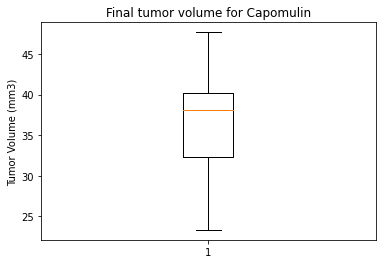

In [142]:
# Put treatments into a list for for loop (and later for plot labels)
    #this is done below

# Create empty list to fill with tumor vol data (for plotting)
    #this is done below

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

#Capomulin IQR and outliers
cap_df = merged_max_time.loc[(merged_max_time["Drug Regimen"] == "Capomulin")] 

cap_quartiles = cap_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq

print(f"The lower quartile of Capomulin treatment is: {cap_lowerq}")
print(f"The upper quartile of Capomulin treatment is: {cap_upperq}")
print(f"The interquartile range of Capomulin treatment is: {cap_iqr}")
print(f"The the median of Capomulin treatment is: {cap_quartiles[0.5]} ")

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

#Generate boxplot
cap_df_tumor = cap_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title("Final tumor volume for Capomulin")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(cap_df_tumor, showfliers=True)

The lower quartile of Ramicane treatment is: 31.56046955
The upper quartile of Ramicane treatment is: 40.65900627
The interquartile range of Ramicane treatment is: 9.098536719999998
The the median of Ramicane treatment is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


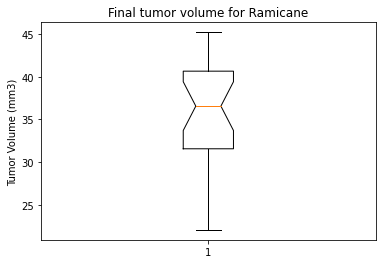

In [143]:
#Ramicane IQR and outliers
ram_df = merged_max_time.loc[(merged_max_time["Drug Regimen"] == "Ramicane")] 

ram_quartiles = ram_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq

print(f"The lower quartile of Ramicane treatment is: {ram_lowerq}")
print(f"The upper quartile of Ramicane treatment is: {ram_upperq}")
print(f"The interquartile range of Ramicane treatment is: {ram_iqr}")
print(f"The the median of Ramicane treatment is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

#Generate boxplot
ram_df_tumor = ram_df["Tumor Volume (mm3)"]
fig2, ax2 = plt.subplots()
ax2.set_title("Final tumor volume for Ramicane")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.boxplot(ram_df_tumor, notch=True, showfliers=True)
plt.show()

The lower quartile of Infubinol treatment is: 54.04860769
The upper quartile of Infubinol treatment is: 65.52574285
The interquartile range of Infubinol treatment is: 11.477135160000003
The the median of Infubinol treatment is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


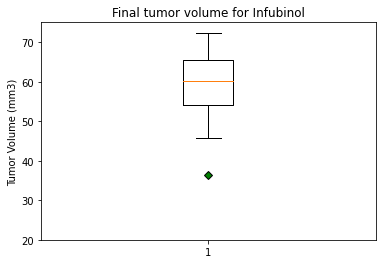

In [146]:
#Infubinol IQR and outliers
inf_df = merged_max_time.loc[(merged_max_time["Drug Regimen"] == "Infubinol")] 

inf_quartiles = inf_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq

print(f"The lower quartile of Infubinol treatment is: {inf_lowerq}")
print(f"The upper quartile of Infubinol treatment is: {inf_upperq}")
print(f"The interquartile range of Infubinol treatment is: {inf_iqr}")
print(f"The the median of Infubinol treatment is: {inf_quartiles[0.5]} ")

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

#Generate boxplot
inf_df_tumor = inf_df["Tumor Volume (mm3)"]
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title("Final tumor volume for Infubinol")
ax3.set_ylabel("Tumor Volume (mm3)")
ax3.boxplot(inf_df_tumor, showfliers=True, flierprops=green_diamond)
plt.ylim(20, 70+5)
plt.show()

The lower quartile of Ceftamin treatment is: 48.72207785
The upper quartile of Ceftamin treatment is: 64.29983003
The interquartile range of Ceftamin treatment is: 15.577752179999997
The the median of Ceftamin treatment is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


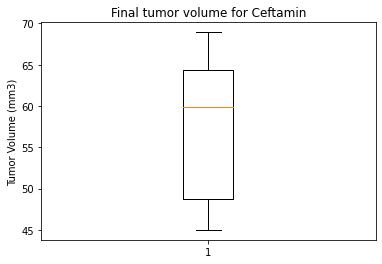

In [147]:
#Ceftamin IQR and outliers
ceft_df = merged_max_time[(merged_max_time["Drug Regimen"] == "Ceftamin")] 

ceft_quartiles = ceft_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

print(f"The lower quartile of Ceftamin treatment is: {ceft_lowerq}")
print(f"The upper quartile of Ceftamin treatment is: {ceft_upperq}")
print(f"The interquartile range of Ceftamin treatment is: {ceft_iqr}")
print(f"The the median of Ceftamin treatment is: {ceft_quartiles[0.5]} ")

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

#Generate boxplot
ceft_df_tumor = ceft_df["Tumor Volume (mm3)"]
red_square = dict(markerfacecolor='r', marker='s')
fig4, ax4 = plt.subplots()
ax4.set_title("Final tumor volume for Ceftamin")
ax4.set_ylabel("Tumor Volume (mm3)")
ax4.boxplot(ceft_df_tumor, showfliers=True, flierprops=red_square)
plt.show()

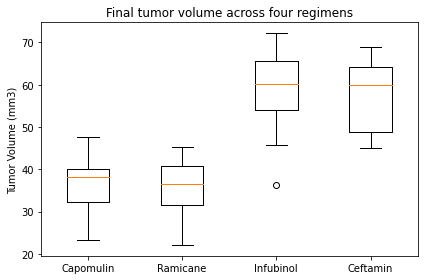

In [148]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = [cap_df_tumor, ram_df_tumor, inf_df_tumor, ceft_df_tumor]
fig5, ax5 = plt.subplots()
ax5.set_title("Final tumor volume across four regimens")
ax5.set_ylabel("Tumor Volume (mm3)")
ax5.boxplot(tumor_vol_data, labels=treatments)
plt.tight_layout()

## Line and Scatter Plots

In [149]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == "Capomulin")]
Capomulin_df = Capomulin_df.set_index("Mouse ID")
timepoint = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
Capomulin_df.head(11)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,5,43.878496,0
s185,Capomulin,Female,3,17,10,37.614948,0
s185,Capomulin,Female,3,17,15,38.177232,0
s185,Capomulin,Female,3,17,20,36.866876,0
s185,Capomulin,Female,3,17,25,33.949940,0
s185,Capomulin,Female,3,17,30,32.959671,1
s185,Capomulin,Female,3,17,35,28.328531,1
s185,Capomulin,Female,3,17,40,25.472143,1


In [150]:
mouse = input("Select a mouse ID: ")

Select a mouse ID: x401


Text(0, 0.5, 'Tumor Volume (mm3)')

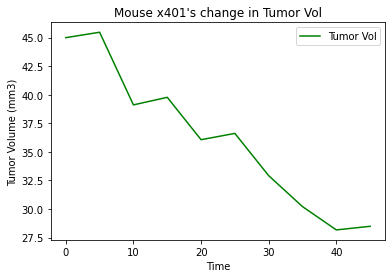

In [151]:
tumor = Capomulin_df.loc[mouse, "Tumor Volume (mm3)"]
plt.figure()
plt.plot(timepoint, tumor, color="green", label="Tumor Vol")

# Plot our line that will be used to track a mouse's losses over the years

# # Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title("Mouse " + mouse + "'s change in Tumor Vol")
plt.xlabel("Time")
#plt.xticks(0, 45+5)
plt.ylabel("Tumor Volume (mm3)")


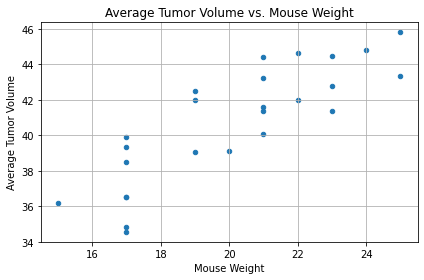

In [152]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_scatter = clean_combined_df.loc[(clean_combined_df["Drug Regimen"] == "Capomulin")]
Capomulin_scatter_grouped = Capomulin_scatter.groupby("Mouse ID")

cap_mouse_weight = Capomulin_scatter_grouped["Weight (g)"].unique()
cap_mouse_tumor = Capomulin_scatter_grouped["Tumor Volume (mm3)"].mean()

new_df = pd.DataFrame({"Mouse Weight": cap_mouse_weight,
                      "Average Tumor Volume": cap_mouse_tumor})

# Create scatter plot
new_df.plot(kind="scatter", x="Mouse Weight", y="Average Tumor Volume", grid=True, title="Average Tumor Volume vs. Mouse Weight")
plt.tight_layout()

## Correlation and Regression

In [153]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#correlation
cap_mouse_weight = cap_mouse_weight.astype(float)
cap_mouse_weight
correlation = st.pearsonr(cap_mouse_weight,cap_mouse_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_mouse_weight, cap_mouse_tumor)
print(f"The r-squared is: {round(rvalue**2,2)}")

The correlation between both factors is 0.84
The r-squared is: 0.71


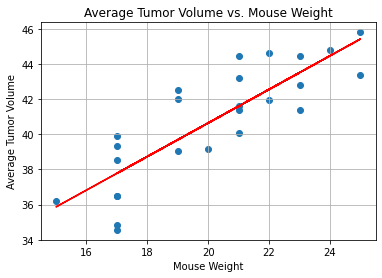

In [154]:
# Add the linear regression equation and line to plot
plt.figure()
regress_values = cap_mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_mouse_weight, cap_mouse_tumor)
plt.plot(cap_mouse_weight,regress_values,"r-")
plt.grid(which='major')
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.show()